# NBaIoT SOM HYPEROPT CLASSIFY

## Device 1

- Training on device 1 (using both Mirai and Gafgyt).
- Testing on device 1 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 7

In [8]:
train_index

7

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt = get_data_d3(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape)

(((52150, 115), (52150,)), ((323072, 115), (323072,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((36505, 115), (15645, 115), (36505,), (15645,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((226150, 115), (96922, 115), (226150,), (96922,))

## Set ratio

In [15]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [16]:
ratio_1 = int(1.0*benign_size)

In [17]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [18]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [19]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [20]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [21]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [22]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [23]:
benign_test_size = data_benign_test.shape[0]

In [24]:
benign_test_size

15645

### Gafgyt

In [25]:
data_gafgyt_test.shape

(96922, 115)

In [26]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [27]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(31290, 115) (31290,)


In [28]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((15645, 115), (15645, 115), (15645,), (15645,))


# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [29]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.000279188156128


### Test on the same device

#### Test on gafgyt

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.03792736 0.0716098  0.04560087 ... 1.24603967 1.2579938  1.24603967]
Visualize quantization error


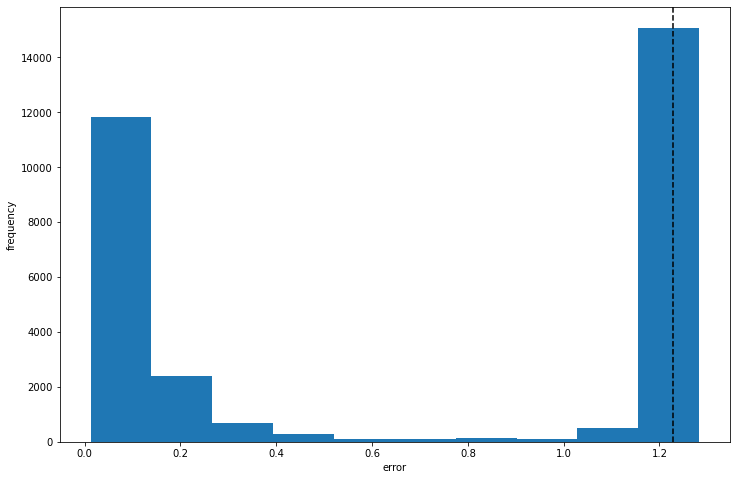

Outliers visualization


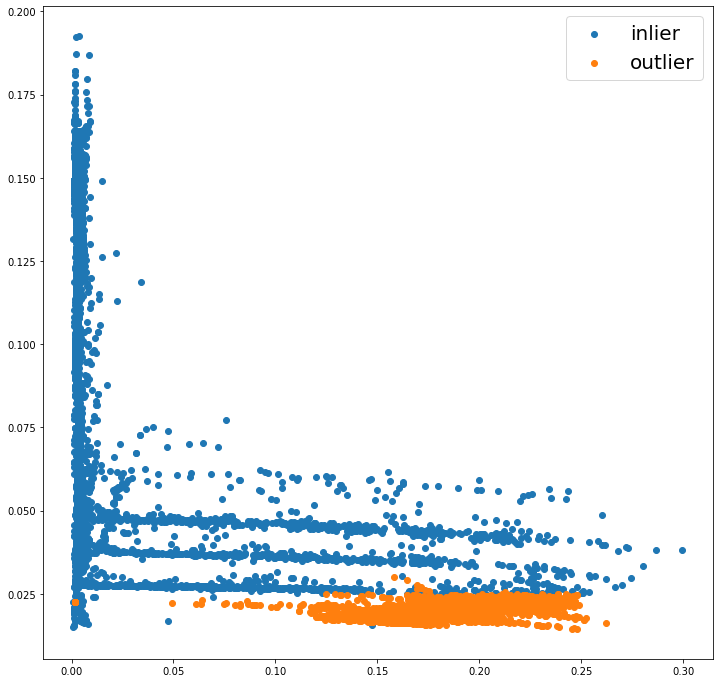

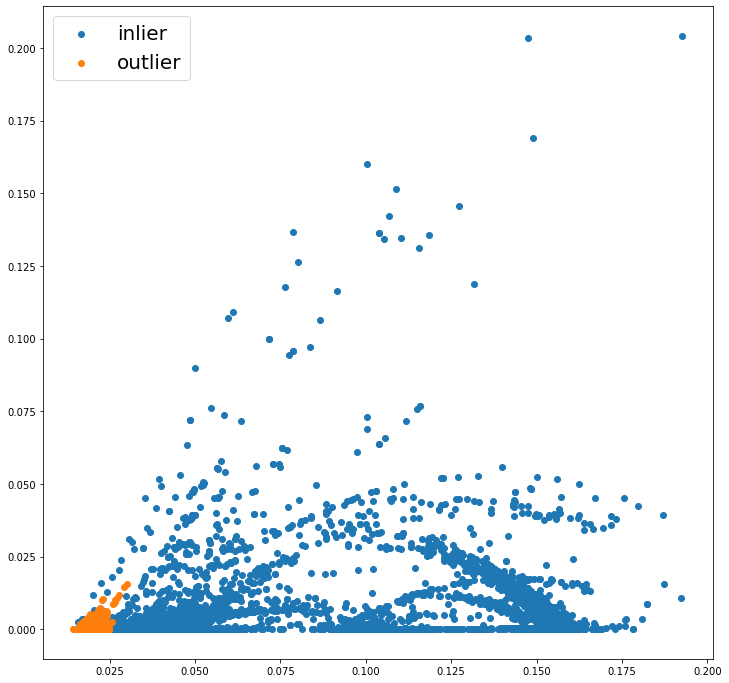

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     15645
           2      0.997     0.998     0.998     15645

    accuracy                          0.998     31290
   macro avg      0.998     0.998     0.998     31290
weighted avg      0.998     0.998     0.998     31290



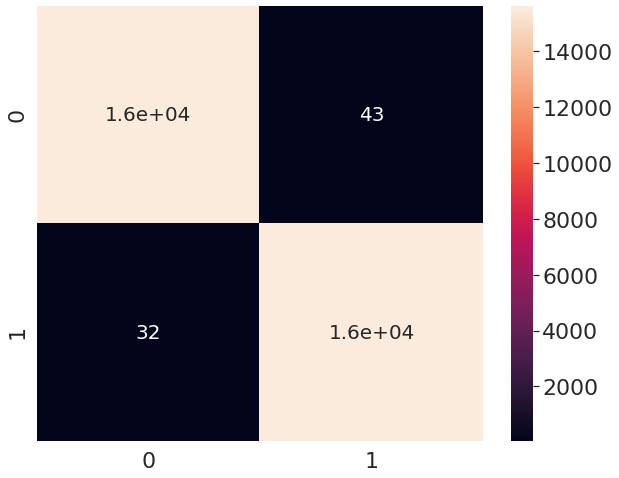

AUC score:  0.9976030680728667


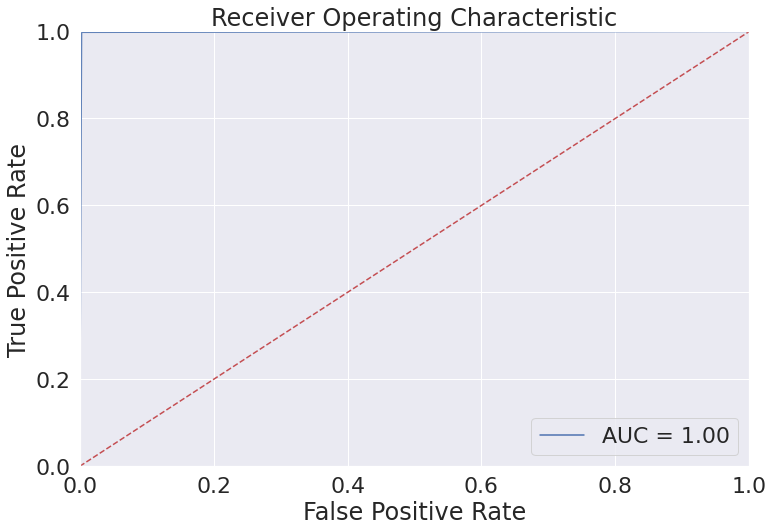

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [30]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [31]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.894363164901733


### Test on the same device

#### Test on gafgyt

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.03945495 0.12440355 0.04050788 ... 1.06765382 1.22006726 1.06765382]
Visualize quantization error


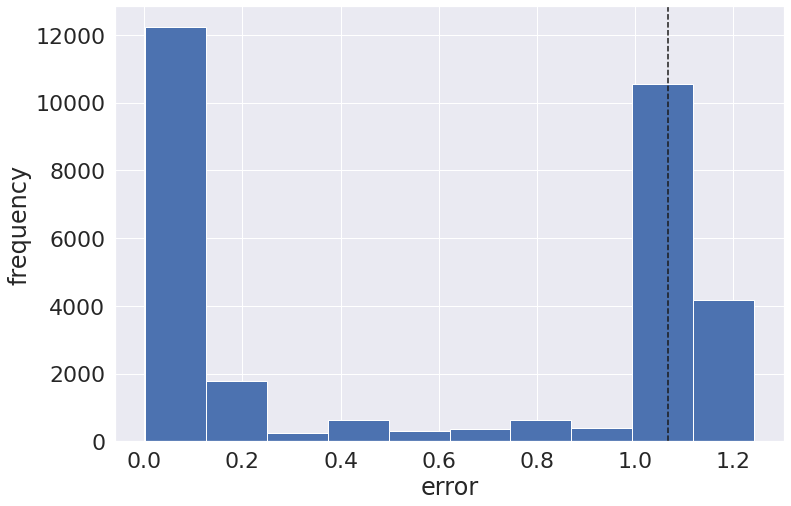

Outliers visualization


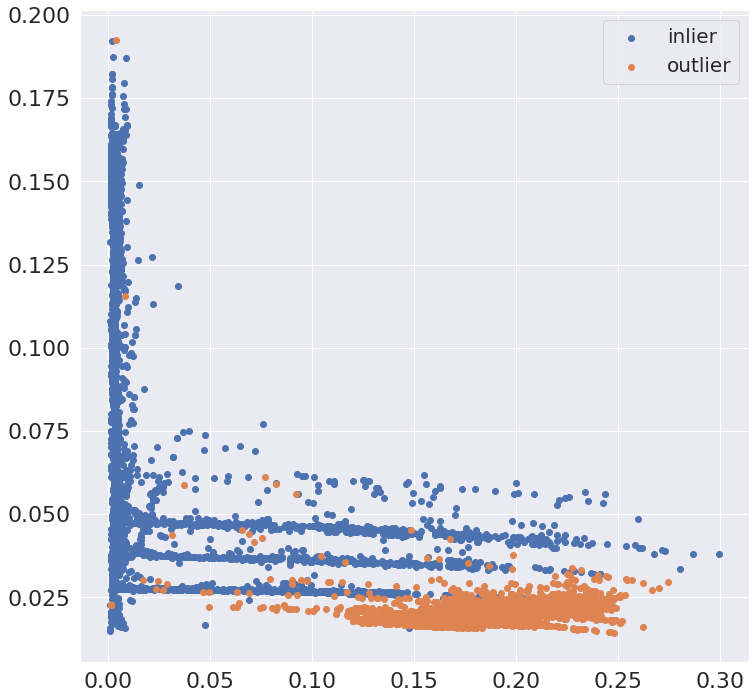

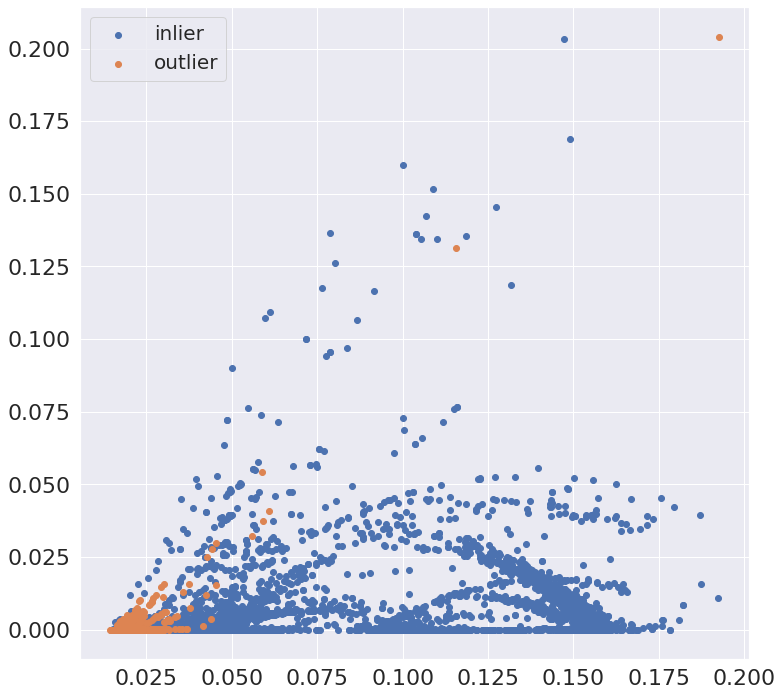

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.992     0.995     15645
           2      0.992     0.998     0.995     15645

    accuracy                          0.995     31290
   macro avg      0.995     0.995     0.995     31290
weighted avg      0.995     0.995     0.995     31290



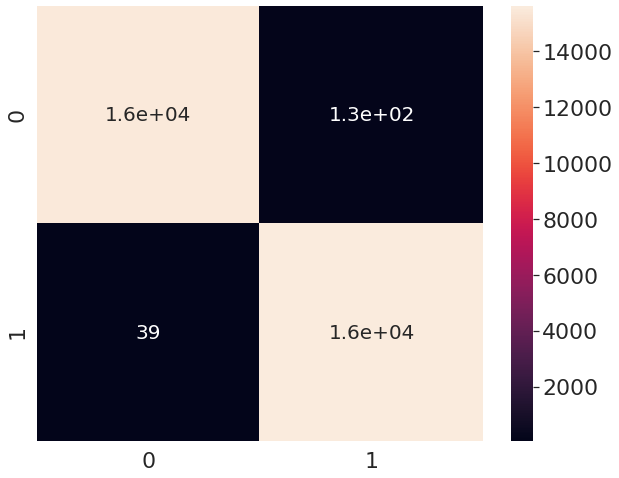

AUC score:  0.9946628315755833


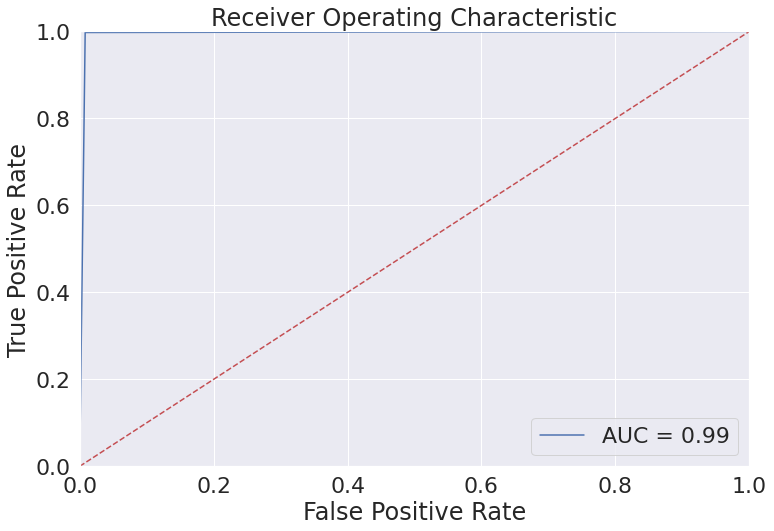

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 3) Set 30

### Train

In [33]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 7.760888338088989


### Test on the same device

#### Test on gafgyt

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.03186967 0.04133694 0.02858849 ... 1.13779303 1.18195963 1.13779303]
Visualize quantization error


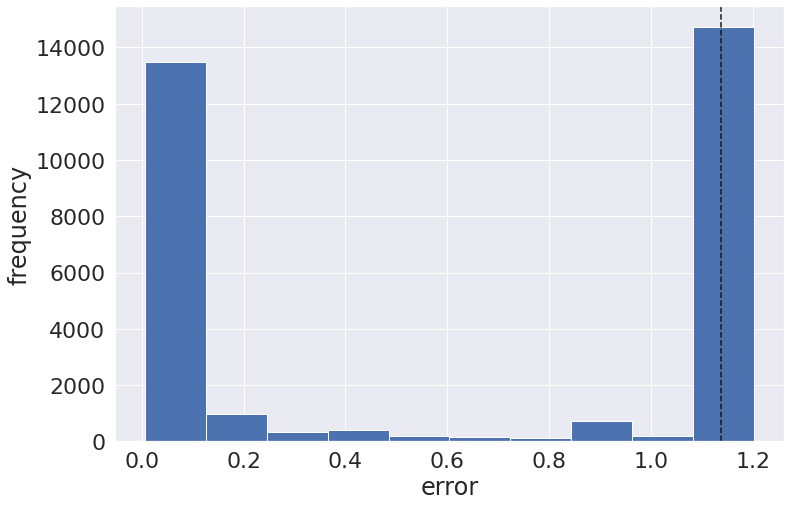

Outliers visualization


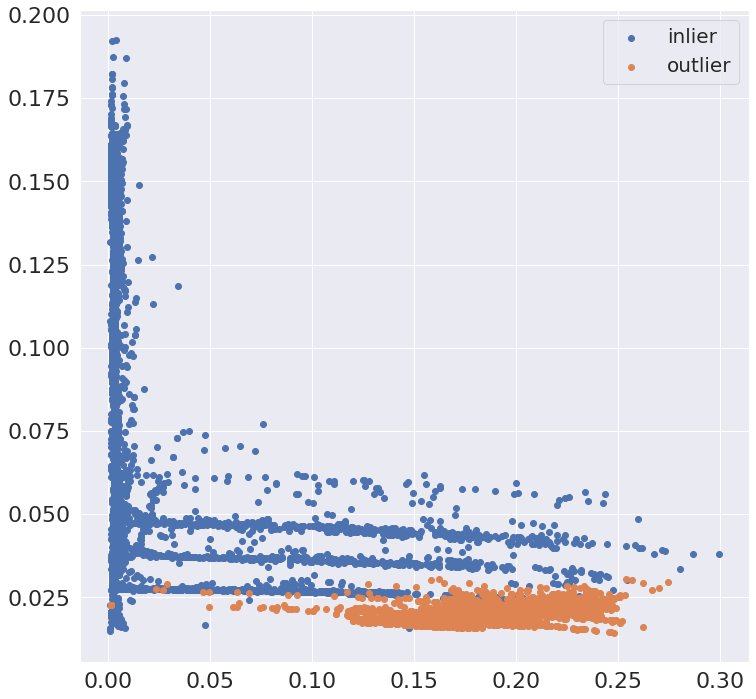

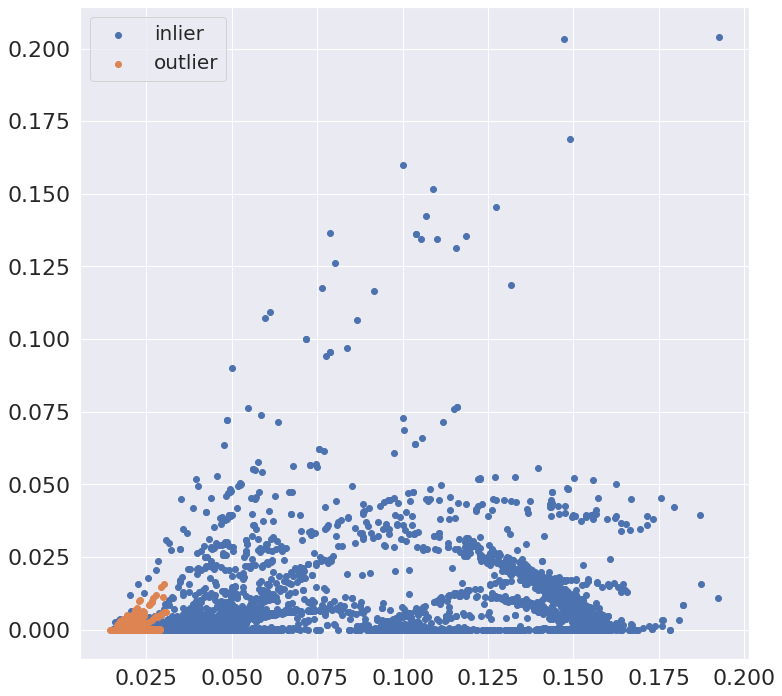

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.996     0.996     15645
           2      0.996     0.997     0.996     15645

    accuracy                          0.996     31290
   macro avg      0.996     0.996     0.996     31290
weighted avg      0.996     0.996     0.996     31290



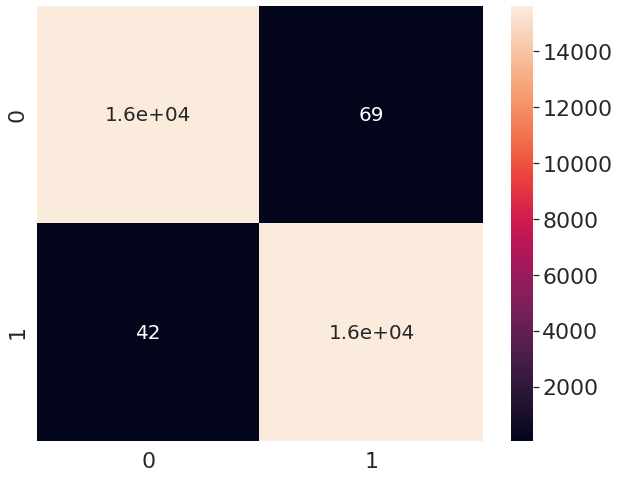

AUC score:  0.9964525407478427


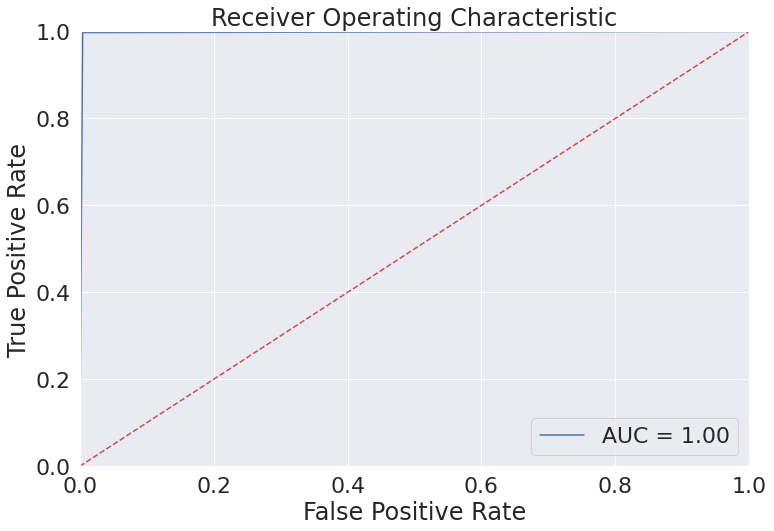

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 4) Set 45

### Train

In [35]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 16.390746116638184


### Test on the same device

#### Test on gafgyt

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02000082 0.03023122 0.01654876 ... 1.04236283 1.17764351 1.04236283]
Visualize quantization error


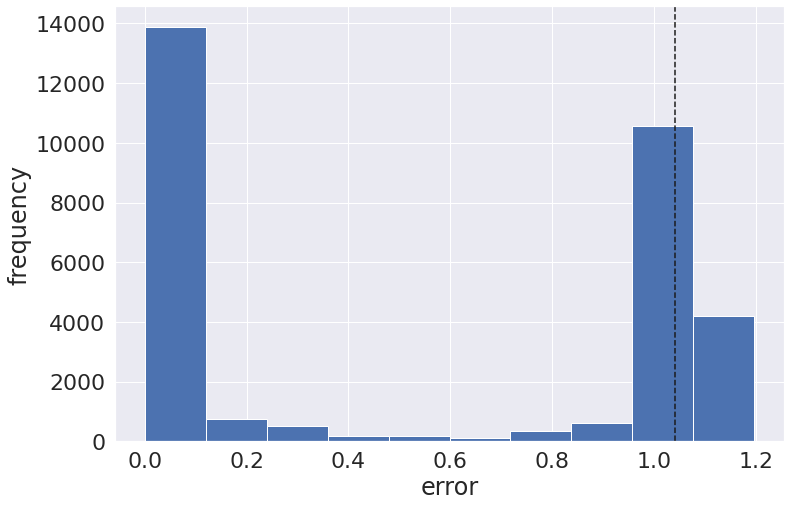

Outliers visualization


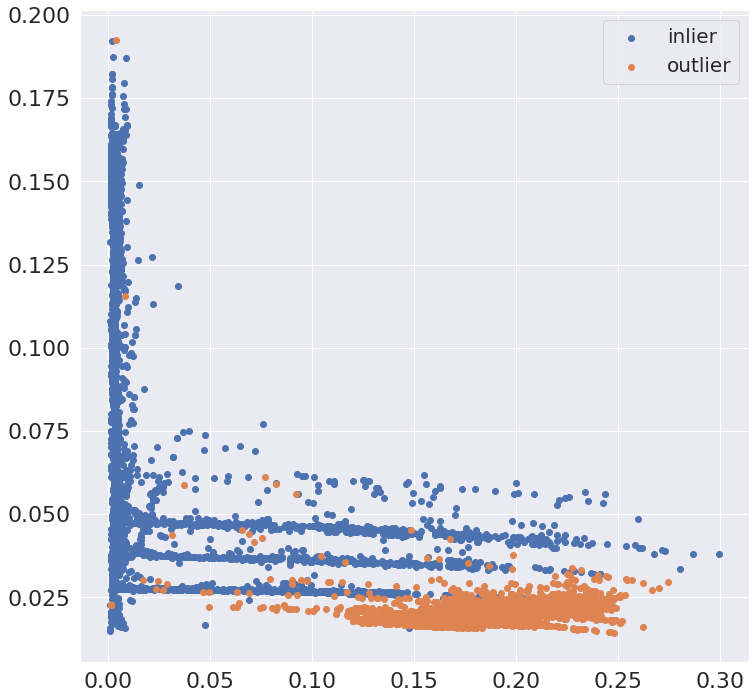

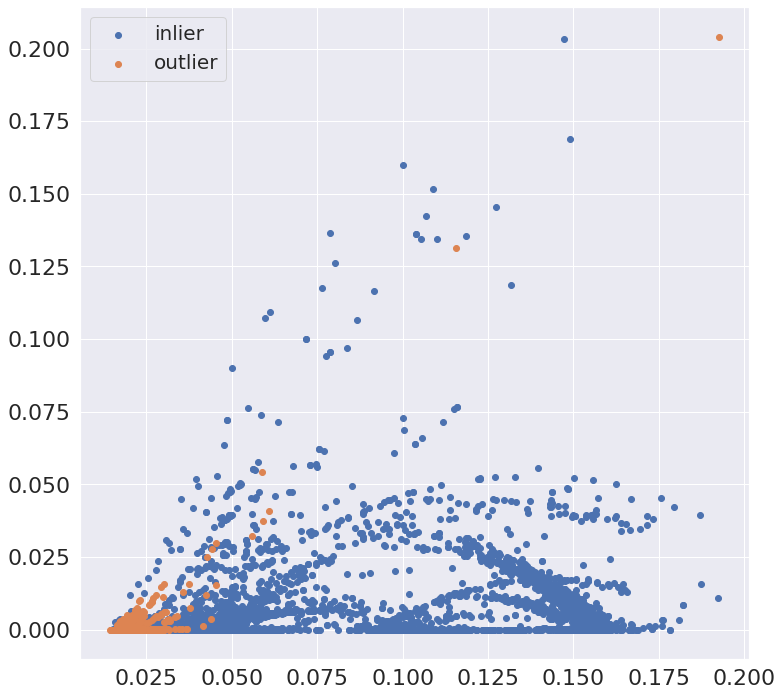

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.997     15645
           2      0.997     0.998     0.997     15645

    accuracy                          0.997     31290
   macro avg      0.997     0.997     0.997     31290
weighted avg      0.997     0.997     0.997     31290



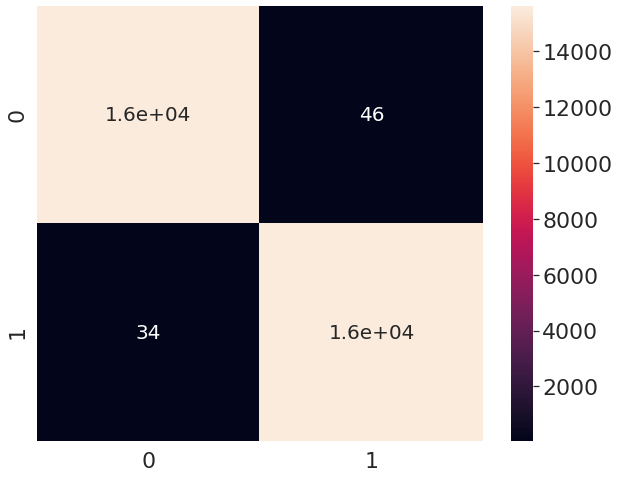

AUC score:  0.9974432726110579


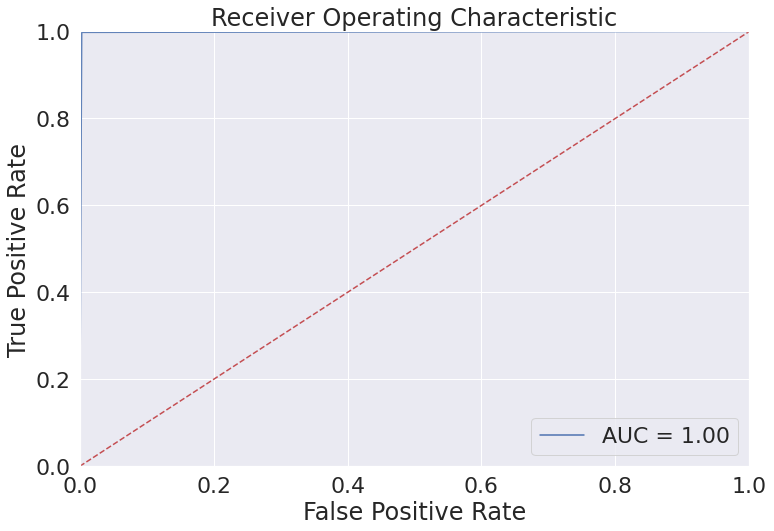

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 1) Algo tpe

### Train

In [37]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 93.37553715705872


### Test on the same device

#### Test on gafgyt

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.02456436 0.04099236 0.02173727 ... 0.91546736 1.17260557 0.91546736]
Visualize quantization error


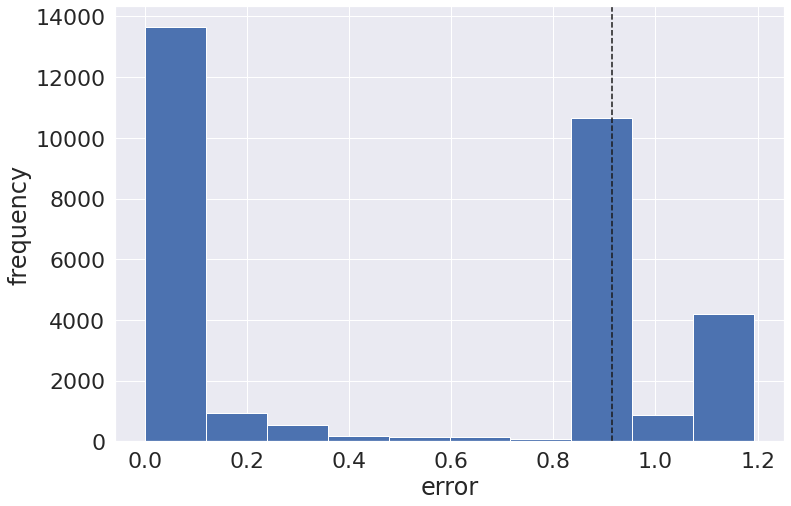

Outliers visualization


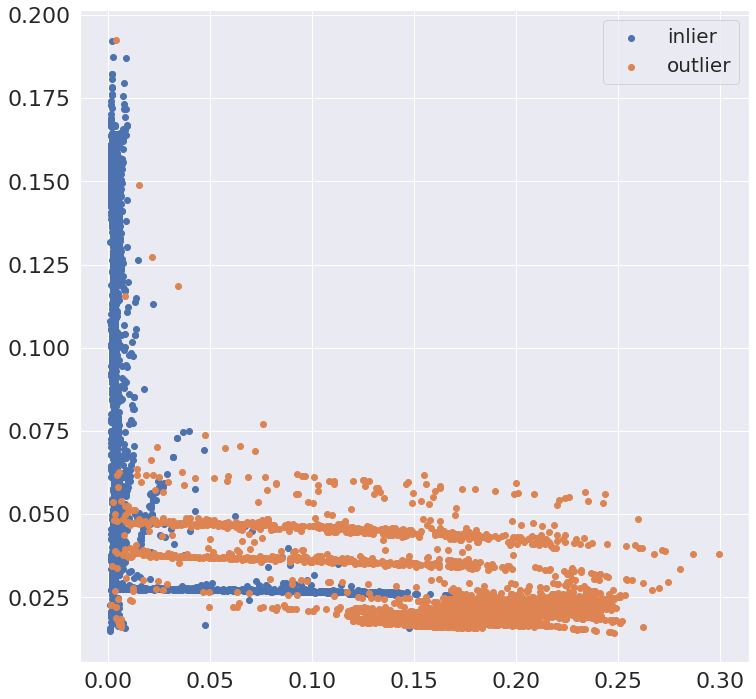

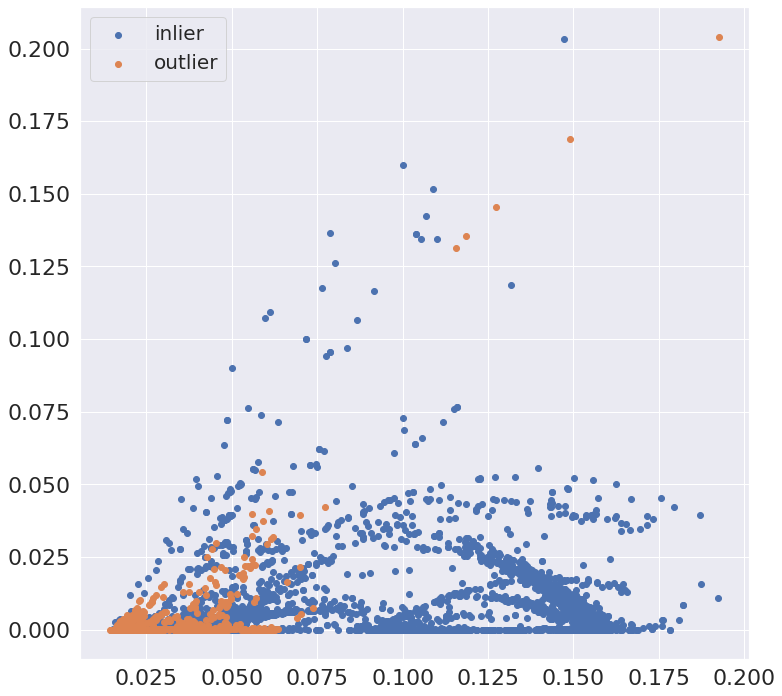

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     15645
           2      0.997     0.998     0.998     15645

    accuracy                          0.998     31290
   macro avg      0.998     0.998     0.998     31290
weighted avg      0.998     0.998     0.998     31290



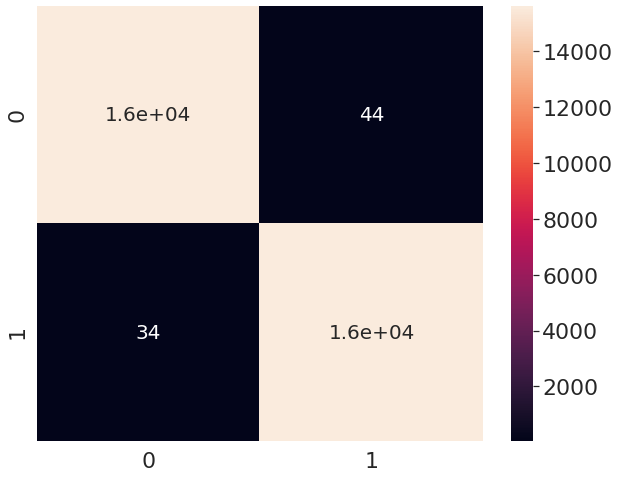

AUC score:  0.9975071907957815


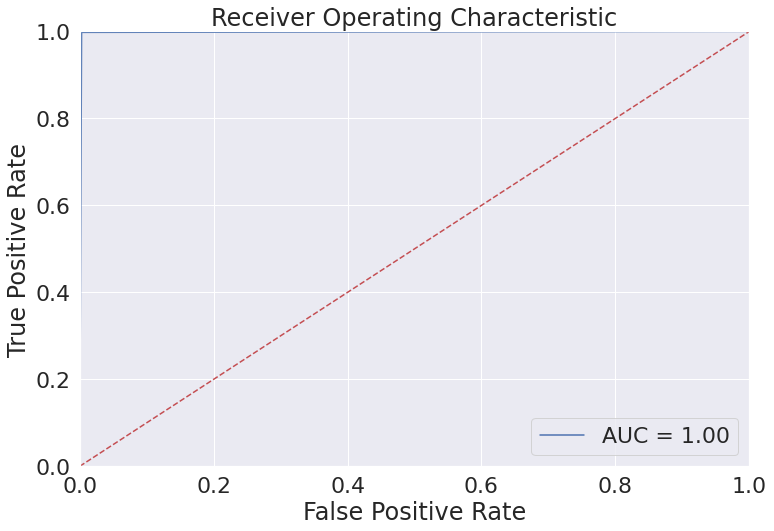

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 2) Algo rand

### Train

In [39]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 78.49848532676697


### Test Gafgyt

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0363315  0.02474355 0.02895278 ... 1.16584578 1.21684252 1.16584577]
Visualize quantization error


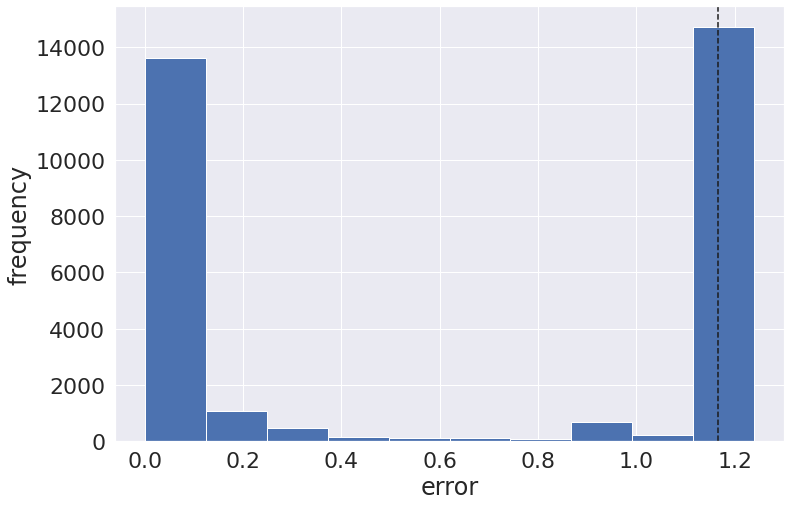

Outliers visualization


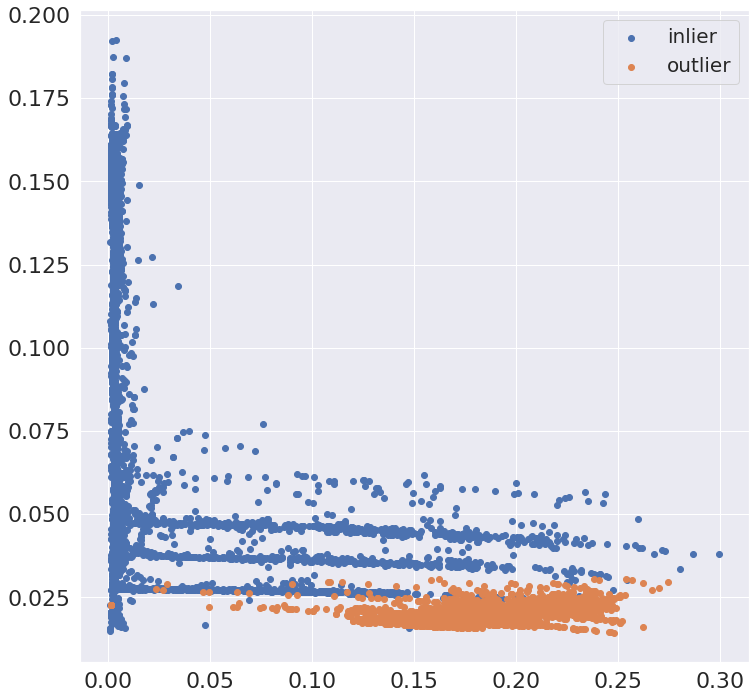

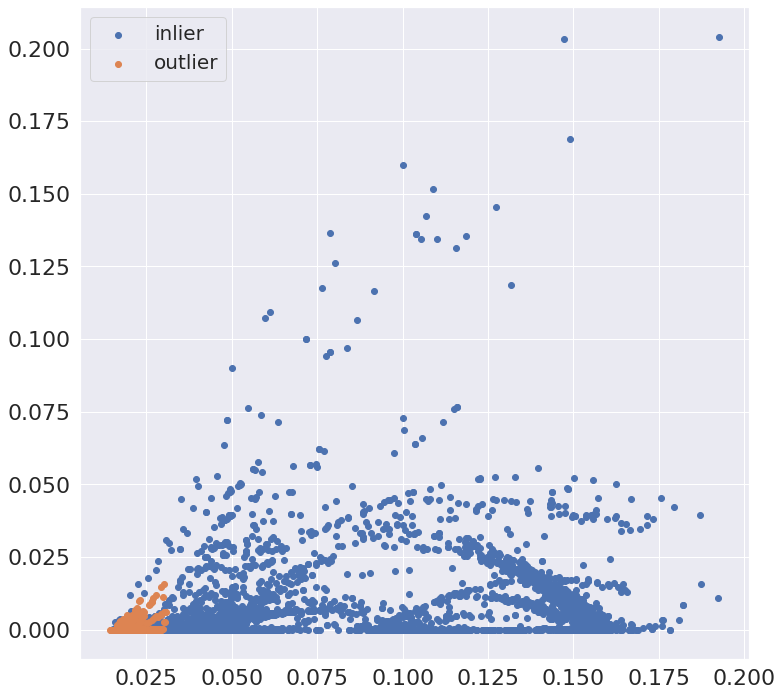

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.994     0.996     15645
           2      0.994     0.999     0.996     15645

    accuracy                          0.996     31290
   macro avg      0.996     0.996     0.996     31290
weighted avg      0.996     0.996     0.996     31290



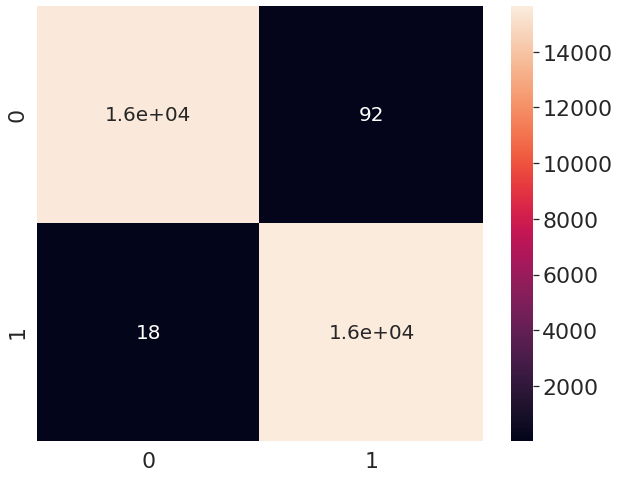

AUC score:  0.9964844998402045


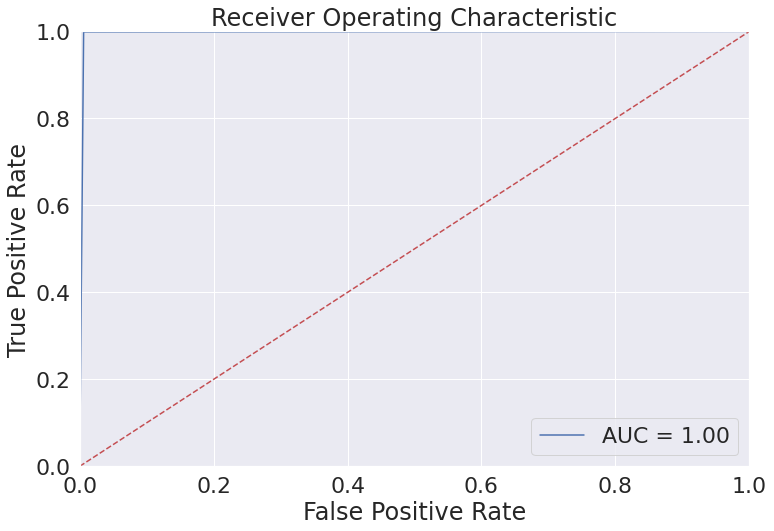

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 3) Algo atpe

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0240879  0.04077779 0.01260702 ... 1.1160747  1.17214698 1.1160747 ]
Visualize quantization error


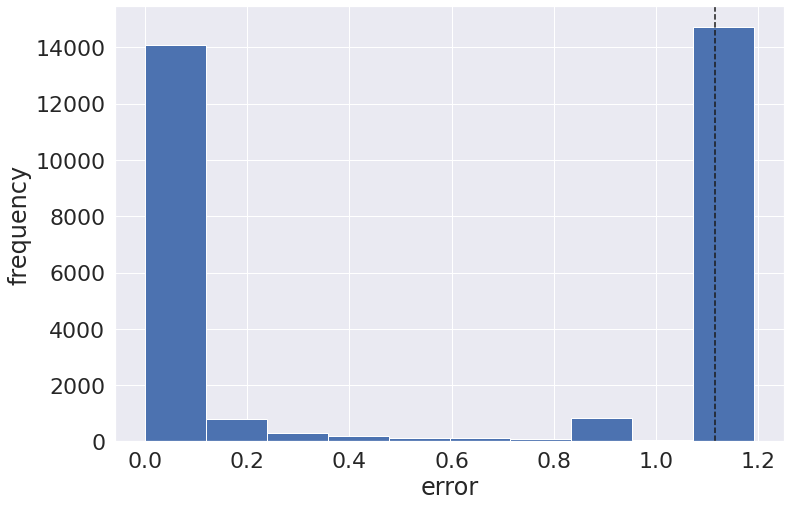

Outliers visualization


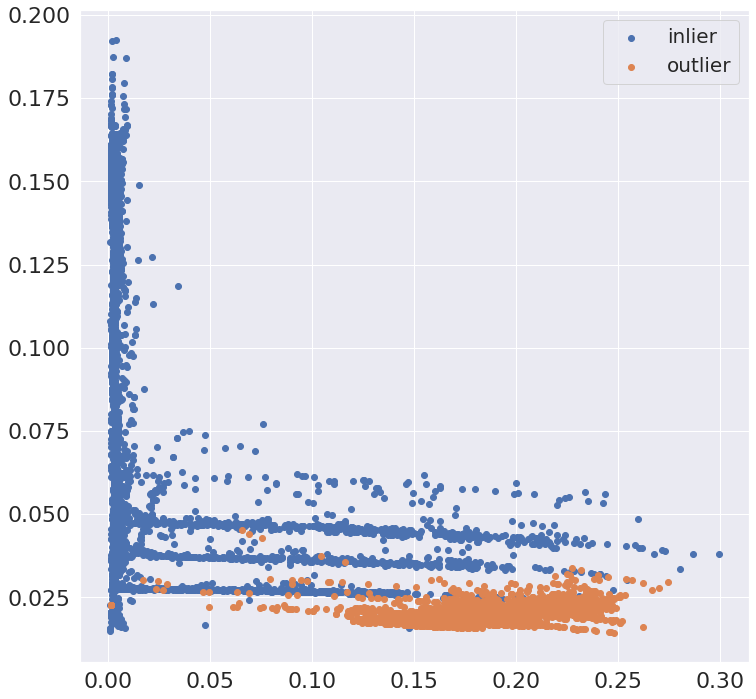

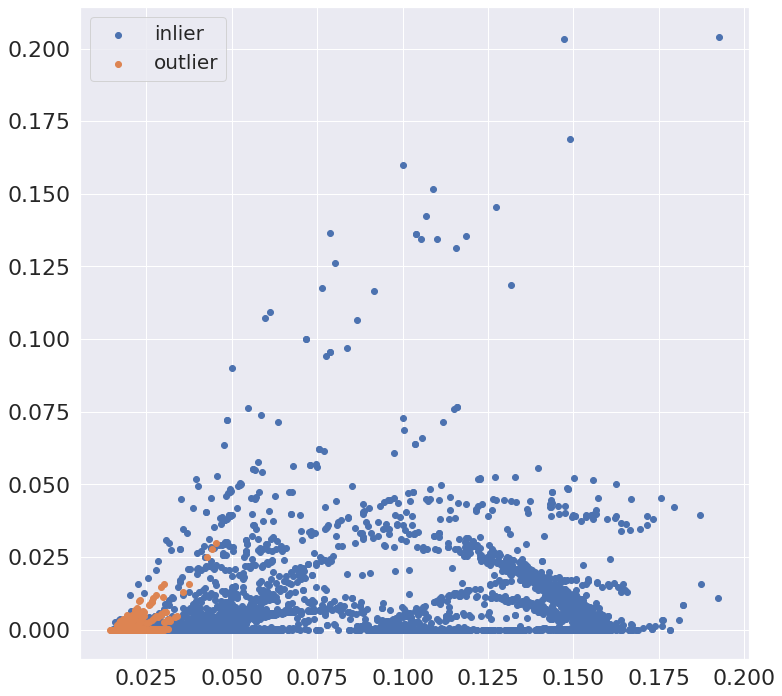

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.997     0.998     15645
           2      0.997     0.999     0.998     15645

    accuracy                          0.998     31290
   macro avg      0.998     0.998     0.998     31290
weighted avg      0.998     0.998     0.998     31290



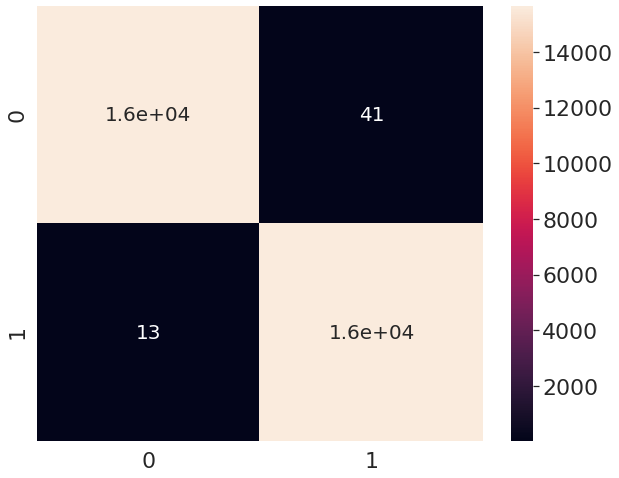

AUC score:  0.998274209012464


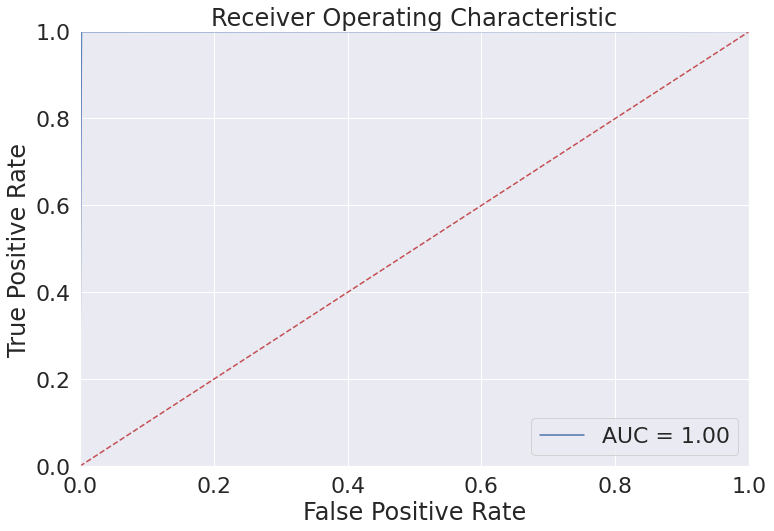

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 4) Algo anneal

In [43]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.77432420e-03  8.55510439e-02  7.68537674e-03 ...  1.25894309e-02
   1.46692520e-08  1.81001003e-04]
 [ 3.54387333e-03  9.26554347e-02  0.00000000e+00 ...  9.62521102e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.54387333e-03  3.61356195e-01  0.00000000e+00 ...  1.04997455e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.05955535e-02  3.84456472e-01  7.86800515e-04 ...  9.89547380e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.70660001e-03  8.43095056e-02  7.47287558e-03 ...  1.25894439e-02
   8.38497364e-18  0.00000000e+00]
 [ 3.54387344e-03  5.05393287e-02  2.25060788e-10 ...  1.20315138e-18
  -1.97861249e-38  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (31290, 115) (31290,)
----------------------Test is starting----------------------
Scale data
Shape:  (31290, 115) (31290,)
Shape:  (31290, 115) (31290,)
Normalize data
Shape:  (31290, 115) (31290,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.03121008 0.0158483  0.02317494 ... 1.23550893 1.25402758 1.23550893]
Visualize quantization error


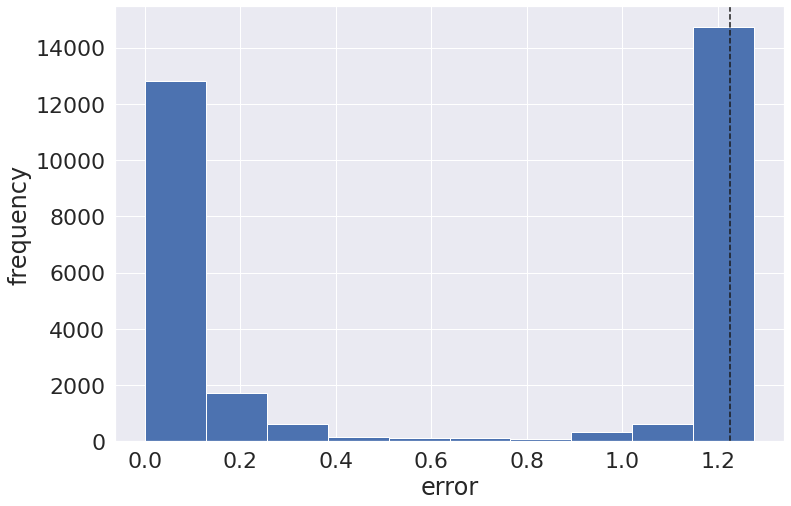

Outliers visualization


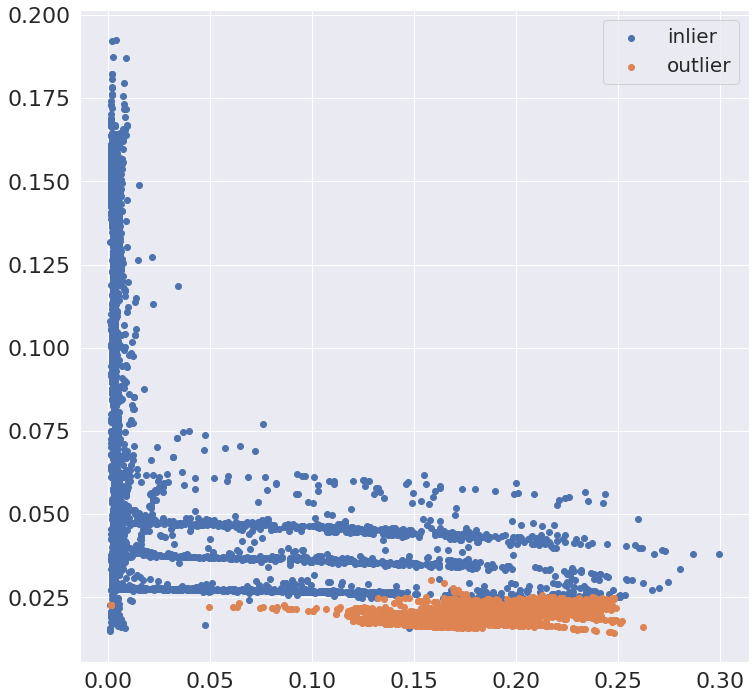

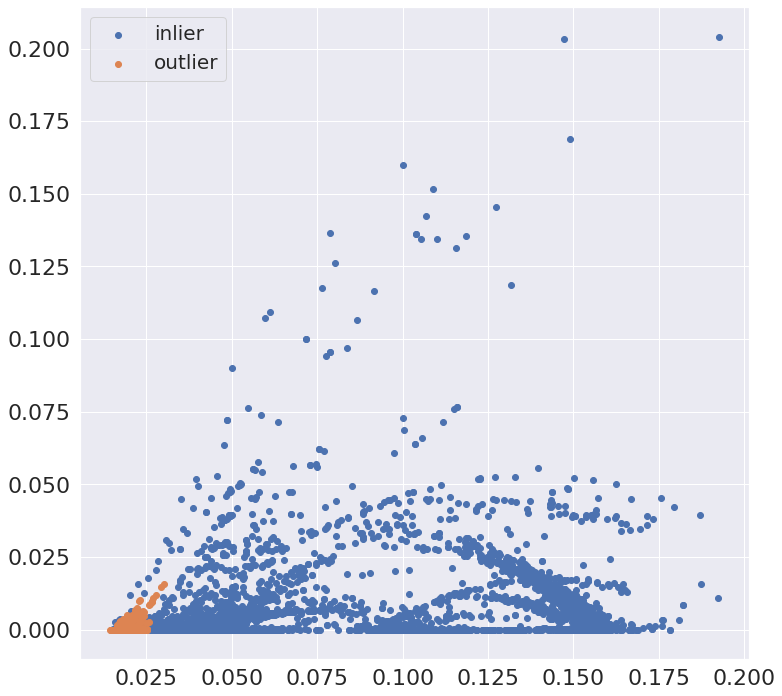

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.992     0.995     15645
           2      0.992     0.997     0.995     15645

    accuracy                          0.995     31290
   macro avg      0.995     0.995     0.995     31290
weighted avg      0.995     0.995     0.995     31290



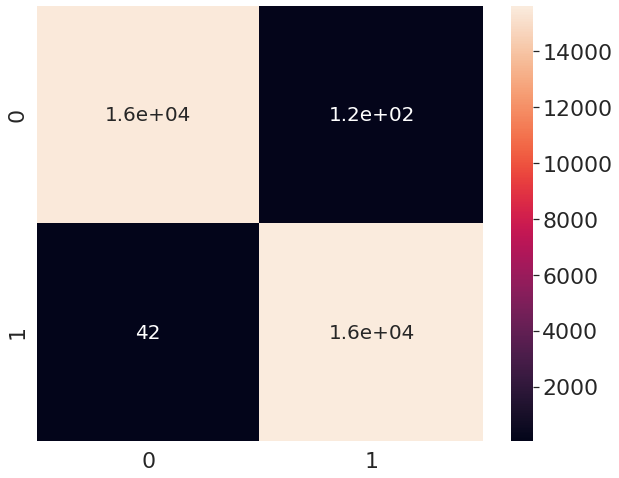

AUC score:  0.9947587088526686


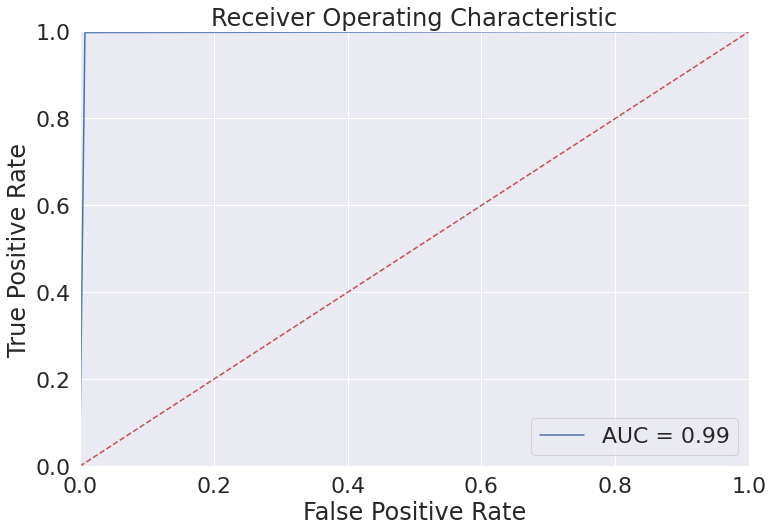

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

## 4.2. Train Mirai